<a href="https://colab.research.google.com/github/malikinza/Linear-Regression-using-Batch-and-Mini-Batch-Gradient-Descent/blob/main/Linear_Regression_using_Batch_and_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv") #housing data

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2


In [4]:
df.shape

(506, 18)

In [5]:
#checking for null values
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
New           0
New1          0
New2          0
MEDV          0
dtype: int64

<ipython-input-6-6aad0daac196>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=30)


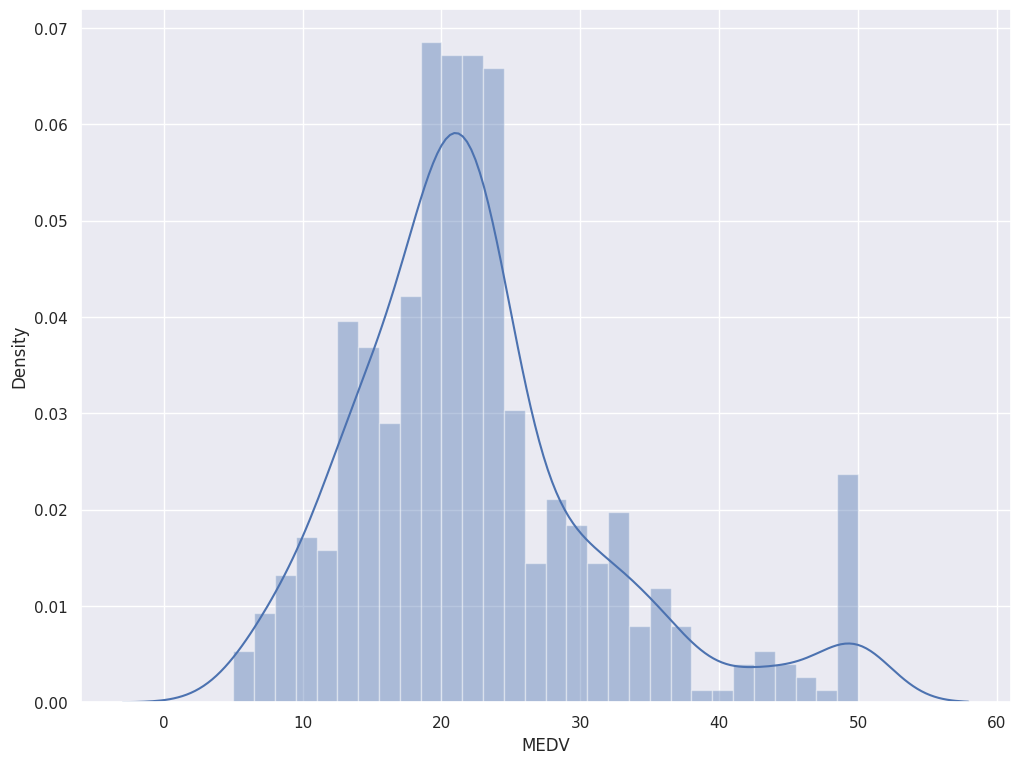

In [6]:
#exploratory data analysis
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [7]:
X = df.iloc[:,1:17].values
y = df.iloc[:,17].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 6)

std = StandardScaler().fit(X_train) 

X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)


#Direct Solution for Linear Regression 


In [8]:
#root mean squared error function to evaluate the model
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [9]:
X_train_std = X_train_std.T
X_train_std = np.vstack((np.ones(np.shape(X_train_std[1])), X_train_std)).T
y_train = y_train.reshape(-1, 1)

X_test_std = X_test_std.T
X_test_std = np.vstack((np.ones(np.shape(X_test_std[1])), X_test_std)).T

Best lambda: 8
Minimum validation error for direct solution: 5.171


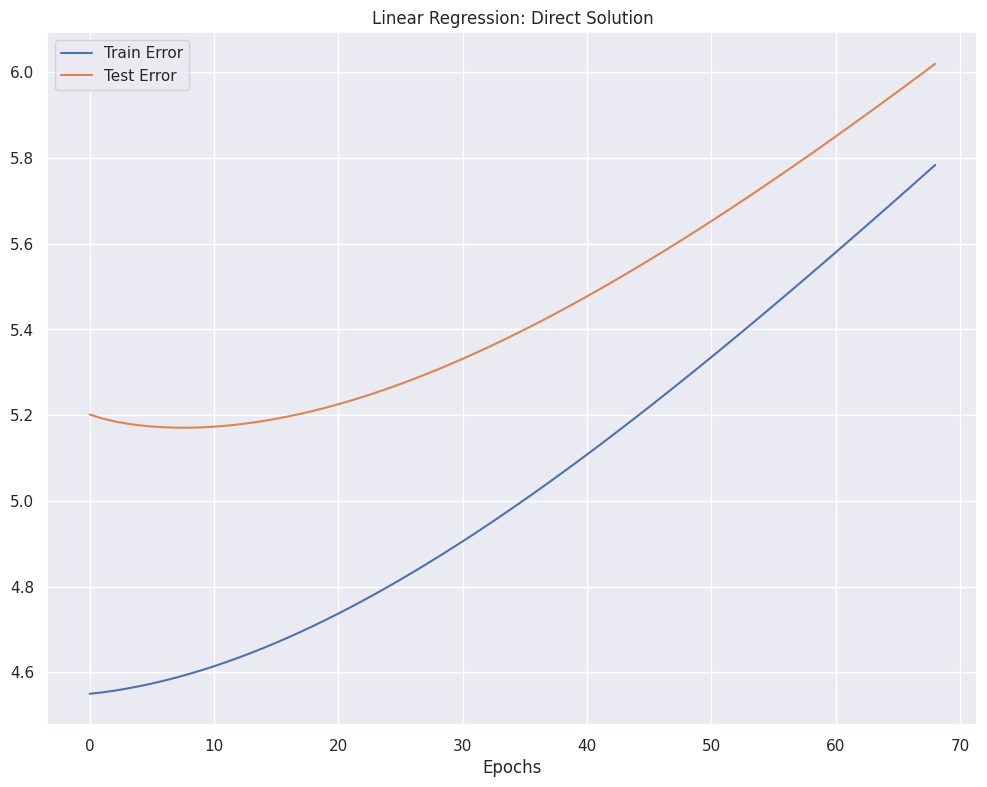

In [10]:
#DIRECT SOLUTION - finding the optimal lambda regularization parameter
#iterating over multiple values for lambda. The optimum lambda is one that outputs the lowest test error. 

t_err = []
v_err = []
for i in range (1,70):
  W = np.dot(np.linalg.inv(np.dot(X_train_std.T, X_train_std) + (i)*np.identity(17)), np.dot(X_train_std.T, y_train))
  yPred_train = np.dot(X_train_std, W)
  yPred_test = np.dot(X_test_std, W)
  train_error = rmse(yPred_train, y_train)
  test_error = rmse(yPred_test, y_test)
  t_err.append(train_error)
  v_err.append(test_error)

#plotting errors
plt.plot(t_err, label = 'Train Error')
plt.plot(v_err, label = 'Test Error')
plt.legend()
plt.xlabel('Epochs') #note Epochs is the total number of iterations of all the training data in one cycle 
plt.title('Linear Regression: Direct Solution')

v_err2 = v_err[np.argmin(v_err)]
print('Best lambda: {}'.format(np.argmin(v_err)))
print('Minimum validation error for direct solution: %0.3f'%(v_err2))

#print(W)


#Full Batch Gradient Descent using a fixed learning rate $\alpha$

Minimum Test Error: 5.163
Error Difference: 0.159 %
Batch Time: 0.215


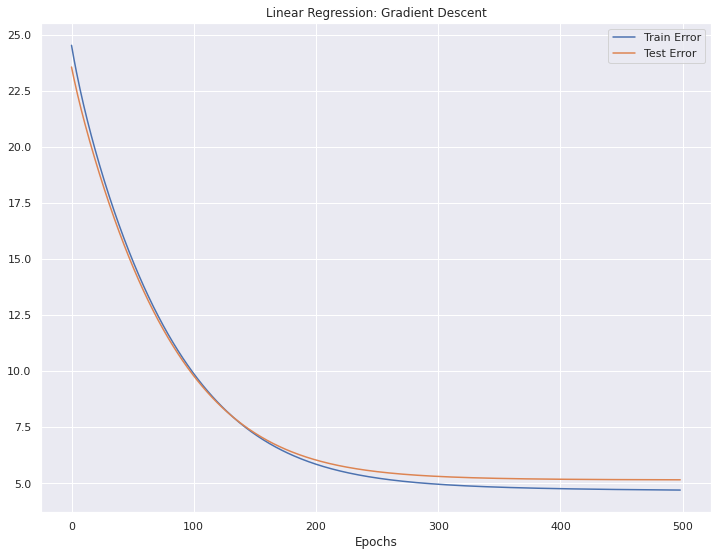

In [ ]:
N = 404 #number of training samples
alpha = 0.01 #learning rate
lam = 8 #optimal lambda regulizer
epoch = 500

W = np.zeros((17,1))
t_err = []
v_err = []
batch_time = []
start = time.time()

for i in range(1,epoch):
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err.append(train_error)
    v_err.append(test_error)

    a = X_train_std.T
    b = yPred_train - y_train  
    W = W - (alpha/N)*(np.dot(a,b) + lam*W) #new W 

stop = time.time()
time_diff = stop -start
batch_time.append(time_diff)

#plotting errors
plt.plot(t_err, label = 'Train Error')
plt.plot(v_err, label = 'Test Error')
plt.legend()
plt.xlabel('Epochs')
plt.title('Linear Regression: Gradient Descent')

v_err3 = v_err[np.argmin(v_err)]
print('Minimum Test Error: %0.3f'%(v_err3))

percent_vdiff23 = abs((v_err3 - v_err2)/v_err2) *100
print('Error Difference: %0.3f'%(percent_vdiff23),'%') #error difference compated to the direct solution

for i in batch_time:
  print('Batch Time: %0.3f'%(i))


# Mini-batch Gradient Descent with fixed learning rate $\alpha$

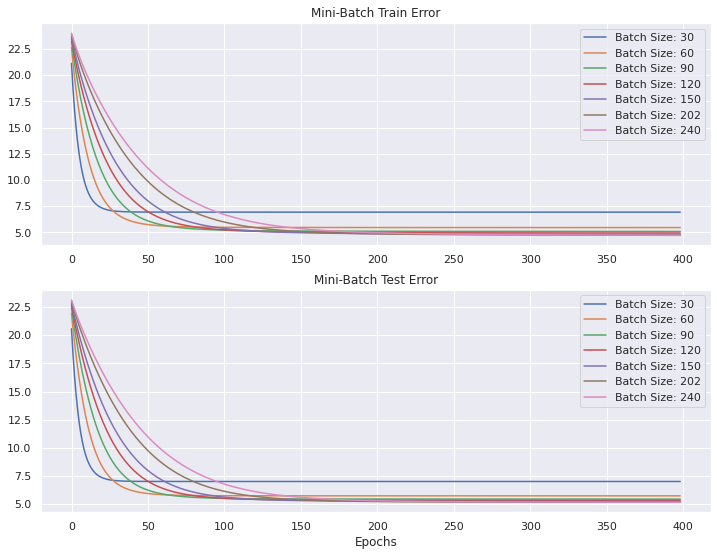

In [ ]:
m = len(y_train)
lam = 8 #lambda
alpha = 0.01 #learning rate
epoch = 400

t_err = [[], [], [], [], [], [],[]]
v_err = [[], [], [], [], [], [],[]]
size = [30,60,90,120,150,202, 240] #batch sizes
batch_time = []

for k in range(1,8):
  
  W = np.zeros((17,1))
  batch_size = size[k-1]
  start = time.time()

  for j in range(1,epoch):
 
    for i in range(0,m, batch_size):      
      X_i = X_train_std[i:i+batch_size,:]
      y_i = y_train[i:i+batch_size,:]
      yPred_train_i = np.dot(X_i, W)
      a = X_i.T
      b = yPred_train_i - y_i
      W = W - (alpha/batch_size)*(np.dot(a,b) + lam*W)
      
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err[k-1].append(train_error)
    v_err[k-1].append(test_error)

  stop = time.time()
  time_diff = stop -start
  batch_time.append(time_diff)

min_verr = [[], [], [], [], [], [],[],[]]
vdiff = [[], [], [], [], [], [],[],[]]

fig, axs = plt.subplots(2)
for r in range(0,7):
  min_test_error = v_err[r][np.argmin(v_err[r])]
  min_verr[r].append(min_test_error)
  #print('Batch size {}:'.format(size[r]), min_verr[r])

  #error difference compared to direct solution
  percent_vdiff = abs((min_verr[r] - v_err2)/v_err2) *100 
  percent_vdiff = float(percent_vdiff)
  vdiff[r].append(percent_vdiff)

  #plotting training error
  axs[0].plot(t_err[r], label = 'Batch Size: {}'.format(size[r]))
  axs[0].set_title('Mini-Batch Train Error')
  axs[0].legend()

  #plotting test error
  axs[1].plot(v_err[r], label = 'Batch Size: {}'.format(size[r]))
  axs[1].set_title('Mini-Batch Test Error')
  axs[1].legend()
  plt.xlabel('Epochs')


In [ ]:
min_verr_frame = []
for i in min_verr:
    for j in i:
        min_verr_frame.append(j)

vdiff_frame = []
for i in vdiff:
    for j in i:
        vdiff_frame.append(j)

boston_data = {'Batch Size': size,'Min Test Error': min_verr_frame,'Error Difference (%)': vdiff_frame, 'Batch Time': batch_time}
df4 = pd.DataFrame(boston_data, columns = ['Batch Size', 'Min Test Error', 'Error Difference (%)', 'Batch Time'])
print(df4.round(3))

   Batch Size  Min Test Error  Error Difference (%)  Batch Time
0          30           7.026                35.870       0.238
1          60           5.752                11.237       0.189
2          90           5.464                 5.676       0.186
3         120           5.348                 3.430       0.172
4         150           5.255                 1.635       0.161
5         202           5.189                 0.356       0.150
6         240           5.192                 0.409       0.155


*A batch size of 202 produces the smallest error difference and batch time.*

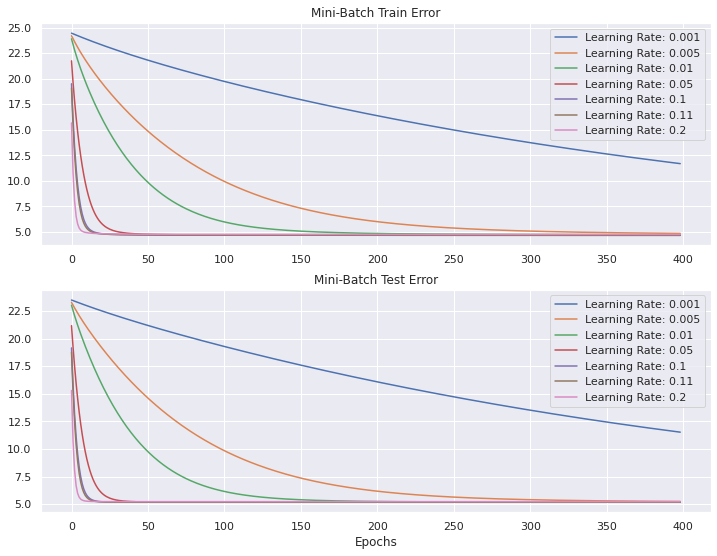

In [ ]:
batch_size = 202 #optimal batch size
m = len(y_train)
lam = 8 #optimal lambda 
epoch = 400

t_err = [[], [], [], [], [], [],[]]
v_err = [[], [], [], [], [], [],[]]
lr = [0.001,0.005,0.01,0.05,0.1,0.11,0.2] #learning rate samples
batch_time = []

for k in range(1,8):
  
  W = np.zeros((17,1))
  alpha = lr[k-1]
  start = time.time()

  for j in range(1,epoch):
 
    for i in range(0,m, batch_size):      
      X_i = X_train_std[i:i+batch_size,:]
      y_i = y_train[i:i+batch_size,:]
      yPred_train_i = np.dot(X_i, W)
      a = X_i.T
      b = yPred_train_i - y_i
      W = W - (alpha/batch_size)*(np.dot(a,b) + lam*W)
      
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err[k-1].append(train_error)
    v_err[k-1].append(test_error)
    
  stop = time.time()
  time_diff = stop -start
  batch_time.append(time_diff)

min_verr = [[], [], [], [], [], [],[]]
vdiff = [[], [], [], [], [], [],[]]

fig, axs = plt.subplots(2)
for r in range(0,7):
  min_test_error = v_err[r][np.argmin(v_err[r])]
  min_verr[r].append(min_test_error)
 
  percent_vdiff = abs((min_verr[r] - v_err2)/v_err2) *100
  percent_vdiff = float(percent_vdiff)
  vdiff[r].append(percent_vdiff)

  #plotting training error
  axs[0].plot(t_err[r], label = 'Learning Rate: {}'.format(lr[r]))
  axs[0].set_title('Mini-Batch Train Error')
  axs[0].legend()

  #plotting test error
  axs[1].plot(v_err[r], label = 'Learning Rate: {}'.format(lr[r]))
  axs[1].set_title('Mini-Batch Test Error')
  axs[1].legend()
  plt.xlabel('Epochs')

In [ ]:
min_verr_frame = []
for i in min_verr:
    for j in i:
        min_verr_frame.append(j)

vdiff_frame = []
for i in vdiff:
    for j in i:
        vdiff_frame.append(j)

boston_data = {'Learning Rate': lr,'Min Test Error': min_verr_frame,'Error Difference (%)': vdiff_frame,'Batch Time': batch_time}
df4 = pd.DataFrame(boston_data, columns = ['Learning Rate', 'Min Test Error', 'Error Difference (%)', 'Batch Time'])
print(df4.round(3))

   Learning Rate  Min Test Error  Error Difference (%)  Batch Time
0          0.001          11.528               122.941       0.171
1          0.005           5.249                 1.507       0.173
2          0.010           5.189                 0.356       0.174
3          0.050           5.185                 0.267       0.170
4          0.100           5.181                 0.193       0.174
5          0.110           5.181                 0.189       0.156
6          0.200           5.230                 1.141       0.152


*Note: The model with a learning rate of 0.005 is the fastest (lowest batch time). However, the model with a learning rate of 0.11 produces the smallest error difference (most accurate).*

## Implementing an adaptive learning rate scheme

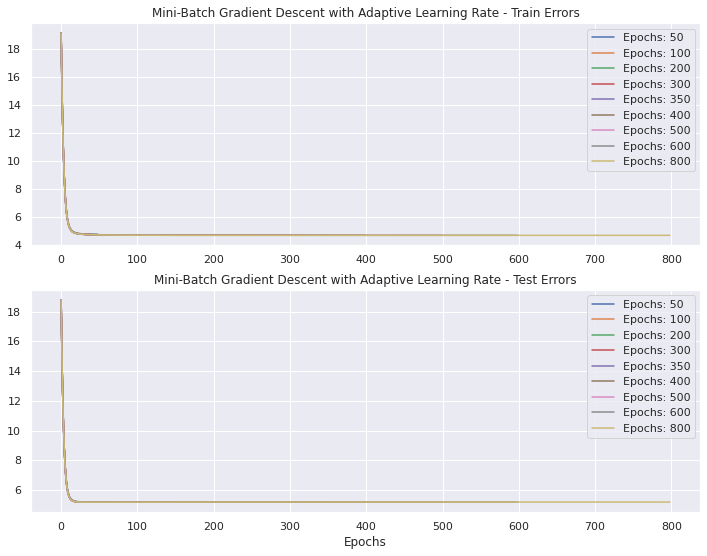

In [ ]:
# Implementing mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. 
# As my adaptive learning rate scheme is dependent of epochs, I tested various epoch values to determine the lowest possible epoch that will result in the smallest error and batch time.

lam = 8 # optimal lambda 
batch_size = 202 #optimal batch size 
m = len(y_train)

t_err = [[], [], [], [], [], [],[],[],[]]
v_err = [[], [], [], [], [], [],[],[],[]]
ep = [50,100,200,300,350,400,500,600,800]
batch_time = []

for k in range(1,10):
  
  start = time.time()
  W = np.zeros((17,1))
  alpha = 0.11 #optimal learning rate 
  epoch = ep[k-1]
  decay_rate = alpha/epoch
  
  for j in range(1,epoch):
 
    for i in range(0,m, batch_size):      
      X_i = X_train_std[i:i+batch_size,:]
      y_i = y_train[i:i+batch_size,:]
      yPred_train_i = np.dot(X_i, W)
      a = X_i.T
      b = yPred_train_i - y_i
      W = W - (alpha/batch_size)*(np.dot(a,b) + lam*W)

    alpha = alpha/(1+ decay_rate*j)  #adaptive learning rate scheme
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err[k-1].append(train_error)
    v_err[k-1].append(test_error)
    
  stop = time.time()
  time_diff = stop -start
  batch_time.append(time_diff)

min_verr = [[], [], [], [], [], [],[],[],[]]
vdiff = [[], [], [], [], [], [],[],[],[]]

fig, axs = plt.subplots(2)
for r in range(0,9):
  min_test_error = v_err[r][np.argmin(v_err[r])]
  min_verr[r].append(min_test_error)
 
  percent_vdiff = abs((min_verr[r] - v_err2)/v_err2) *100
  percent_vdiff = float(percent_vdiff)
  vdiff[r].append(percent_vdiff)

  #plotting training error
  axs[0].plot(t_err[r], label = 'Epochs: {}'.format(ep[r]))
  axs[0].set_title('Mini-Batch Gradient Descent with Adaptive Learning Rate - Train Errors')
  axs[0].legend()

  #plotting test error
  axs[1].plot(v_err[r], label = 'Epochs: {}'.format(ep[r]))
  axs[1].set_title('Mini-Batch Gradient Descent with Adaptive Learning Rate - Test Errors')
  axs[1].legend()
  plt.xlabel('Epochs')



In [ ]:
min_verr_frame = []
for i in min_verr:
    for j in i:
        min_verr_frame.append(j)

vdiff_frame = []
for i in vdiff:
    for j in i:
        vdiff_frame.append(j)

boston_data = {'Epochs': ep,'Min Test Error': min_verr_frame,'Error Difference (%)': vdiff_frame,'Batch Time': batch_time}
df4 = pd.DataFrame(boston_data, columns = ['Epochs', 'Min Test Error', 'Error Difference (%)', 'Batch Time'])
print(df4.round(3))

   Epochs  Min Test Error  Error Difference (%)  Batch Time
0      50           5.194                 0.446       0.024
1     100           5.186                 0.297       0.041
2     200           5.183                 0.231       0.077
3     300           5.182                 0.212       0.124
4     350           5.182                 0.207       0.146
5     400           5.181                 0.204       0.176
6     500           5.181                 0.199       0.202
7     600           5.181                 0.197       0.243
8     800           5.181                 0.194       0.325


*Note: As expected, the batch time increases as the number of epochs increase. The test error does not decrease much with increasing epochs beyond 300 epochs. Beyond 400 epochs, the test error does not change within 3 decimal places. Therefore, to obtain the smallest possible batch time without compromising accuracy, 300-400 epochs are sufficient.*

## Most accurate model - smallest error difference to direct solution


Minimum Test Error: 5.181
Error Difference: 0.189 %
Average Batch Time: 0.143


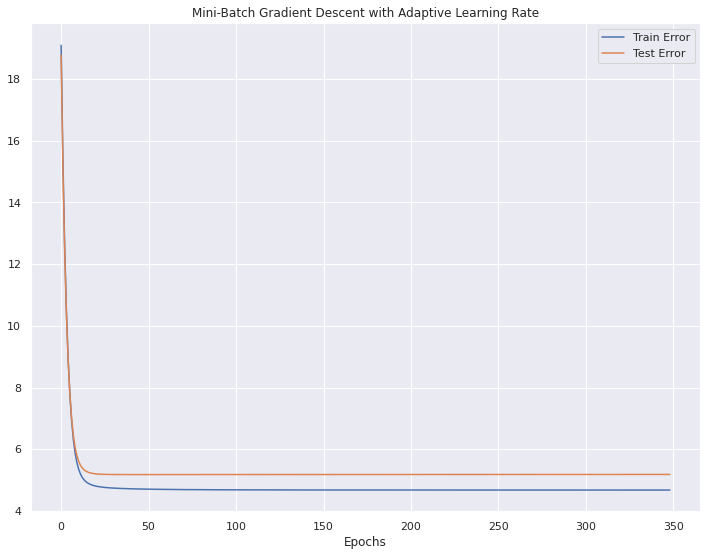

In [ ]:
#CASE 1: Smallest possible error difference - most accurate model

lam = 8 # optimal lambda 
batch_size = 202 #optimal batch size 
epoch6 = 350 #optimal epoch 
m = len(y_train)
decay_rate = alpha/epoch6
batch_time = []

for k in range(0,15): #running case 15 times

  W = np.zeros((17,1))
  alpha = 0.11 #optimal learning rate 
  t_err = []
  v_err = []
  start = time.time()

  for j in range(1,epoch6):
  
    for i in range(0,m, batch_size):
      X_i = X_train_std[i:i+batch_size,:]
      y_i = y_train[i:i+batch_size,:]
  
      yPred_train_i = np.dot(X_i, W)
      a = X_i.T
      b = yPred_train_i - y_i
      W = W - (alpha/batch_size)*(np.dot(a,b) + lam*W)

    alpha = alpha/(1+ decay_rate*j)
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err.append(train_error)
    v_err.append(test_error)
    
  stop = time.time()
  time_diff = stop -start
  batch_time.append(time_diff)
  
#plotting errors
plt.plot(t_err, label = 'Train Error')
plt.plot(v_err, label = 'Test Error')
plt.legend()
plt.xlabel('Epochs')
plt.title('Mini-Batch Gradient Descent with Adaptive Learning Rate')

v_err61 = v_err[np.argmin(v_err)]
print('Minimum Test Error: %0.3f'%(v_err61))

percent_vdiff61 = (v_err61 - v_err2)/v_err2 *100
print('Error Difference: %0.3f'%(percent_vdiff61),'%')

batch_time_mean1 = np.mean(batch_time)
print('Average Batch Time: %0.3f'%(batch_time_mean1))

#print(W)

## Fastest model - smallest batch time within 1% error

Minimum Epochs to Train Model within 1% Error: 19
Test Error: 5.221
Error Difference: 0.973 %
Average Batch Time: 0.008


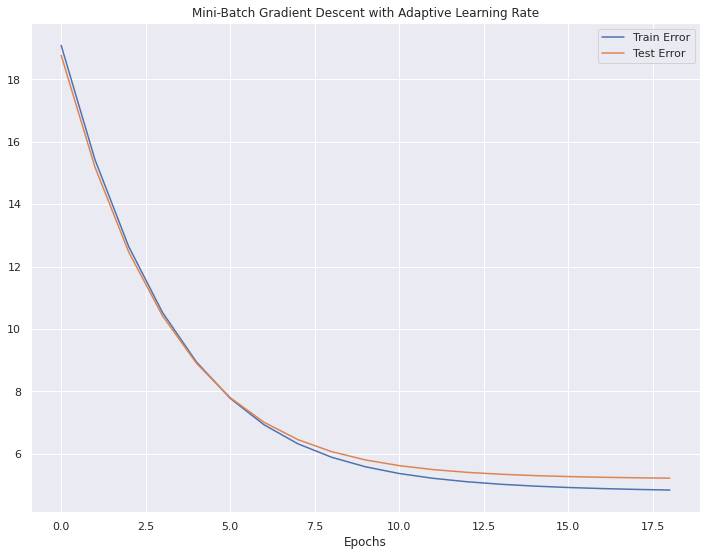

In [ ]:
#CASE 2: Smallest possible batch time within 1% error  - fastest model

lam = 8 # optimal lambda 
batch_size = 202 #optimal batch size 
epoch = 350 #optimal epoch 
m = len(y_train)
decay_rate = alpha/epoch
batch_time = []

for k in range(0,15): #running case 15 times

  W = np.zeros((17,1))
  alpha = 0.11
  t_err = []
  v_err = []
  start = time.time()

  for j in range(1,epoch):
  
    for i in range(0,m, batch_size):
      X_i = X_train_std[i:i+batch_size,:]
      y_i = y_train[i:i+batch_size,:]
  
      yPred_train_i = np.dot(X_i, W)
      a = X_i.T
      b = yPred_train_i - y_i
      W = W - (alpha/batch_size)*(np.dot(a,b) + lam*W)

    alpha = alpha/(1+ decay_rate*j)
    yPred_train = np.dot(X_train_std, W)
    yPred_test = np.dot(X_test_std, W)
    train_error = rmse(yPred_train, y_train)
    test_error = rmse(yPred_test, y_test)
    t_err.append(train_error)
    v_err.append(test_error)

    if test_error < 1.01*v_err2:
      break
         
  stop = time.time()
  time_diff = stop -start
  batch_time.append(time_diff)

min_j = j
print('Minimum Epochs to Train Model within 1% Error:',j)


#plotting errors
plt.plot(t_err, label = 'Train Error')
plt.plot(v_err, label = 'Test Error')
plt.legend()
plt.xlabel('Epochs')
plt.title('Mini-Batch Gradient Descent with Adaptive Learning Rate')

v_err62 = v_err[np.argmin(v_err)]
print('Test Error: %0.3f'%(v_err62))

percent_vdiff62 = (v_err62 - v_err2)/v_err2 *100
print('Error Difference: %0.3f'%(percent_vdiff62),'%')

batch_time_mean2 = np.mean(batch_time)
print('Average Batch Time: %0.3f'%(batch_time_mean2))

#print(W)

In [ ]:
#Summary of Final Model Parameters

params = {'Parameters': ['Batch Size', 'Lambda Regulizer', 'Learning Rate', 'Epochs', 'Iterations'], 'Values': ['202','8','0.11','350/ 19','700/ 38']}
df5 = pd.DataFrame(params,columns = ['Parameters','Values'])
print(df5)

         Parameters   Values
0        Batch Size      202
1  Lambda Regulizer        8
2     Learning Rate     0.11
3            Epochs  350/ 19
4        Iterations  700/ 38


In [ ]:
#Summary of Results

boston_data_Q6 = {'Model': ['Most Accurate','Fastest'],'Epochs': [epoch6, min_j],'Min Test Error': [v_err61, v_err62],'Error Difference (%)': [percent_vdiff61, percent_vdiff62],'Batch Time': [batch_time_mean1, batch_time_mean2]}
df6 = pd.DataFrame(boston_data_Q6, columns = ['Model','Epochs', 'Min Test Error', 'Error Difference (%)', 'Batch Time'])
print(df6.round(3))


           Model  Epochs  Min Test Error  Error Difference (%)  Batch Time
0  Most Accurate     350           5.181                 0.189       0.143
1        Fastest      19           5.221                 0.973       0.008


***SUMMARY***

I arrived at these final parameters by first plotting various batch sizes and learning rates at 400 epochs. The test errors, error differences and batch times for these parameters are summarized in tables above. Using the optimal batch size of 202 and learning rate of 0.11, I implemented an adaptive learning rate scheme. As my learning rate scheme was dependent on epochs, I tested various epoch sizes to find the optimal value that would result in the lowest possible batch time and greatest accuracy.  

Finally, I presented two possible models. Model 1 is accurate to the direct solution to 0.19% error difference. Model 2 follows the direct solution to within 1% error difference. However, it is considerably faster with a batch time of 0.008 seconds. Both models use the same parameters (batch size, learning rate...etc). In order to obtain the accuracy of model 1, I ran it for 350 epochs. Conversely, model 2 stopped running as soon as the test error was within 1% difference. This occured at 19 epochs. 

The minimum test error obtained from the full batch gradient descent was 5.163, with a 0.16% error difference. While the error difference for the full batch gradient descent is smaller than my most accurate mini-batch gradient descent model, the full batch model is slower, with a batch time of 0.194 seconds. 

Ultimately, both of my final models are within 1% error. Depending on the need for highest accuracy or fastest convergence, either model will produce sufficient results.

